**Sprint 3**


1.   **Team ID: PNT2022TMID49509**
2.   **Date:05/11/2022**



**Importing library files**

In [14]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [15]:
pwd

'/content'

In [16]:
ls

sample_data/


In [17]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


**Image preprocessing**

In [18]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory("/content/drive/MyDrive/archive (1)/forest_fire/Training and Validation",
                                        target_size=(150,150),
                                        batch_size=32,
                                        class_mode='binary')
test_dataset=test.flow_from_directory("/content/drive/MyDrive/archive (1)/forest_fire/Testing",
                                        target_size=(150,150),
                                        batch_size=32,
                                        class_mode='binary')

Found 1852 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [19]:
test_dataset.class_indices

{'fire': 0, 'no fire': 1}

**Model building**

In [20]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
r=model.fit(train_dataset,epochs=7,validation_data=test_dataset)

Epoch 1/7
58/58 [==============================] - 257s 4s/step - loss: 0.3354 - accuracy: 0.8607 - val_loss: 0.3862 - val_accuracy: 0.8676
Epoch 2/7
58/58 [==============================] - 84s 1s/step - loss: 0.1499 - accuracy: 0.9460 - val_loss: 0.2213 - val_accuracy: 0.9265
Epoch 3/7
58/58 [==============================] - 79s 1s/step - loss: 0.1465 - accuracy: 0.9449 - val_loss: 0.2286 - val_accuracy: 0.8971
Epoch 4/7
58/58 [==============================] - 79s 1s/step - loss: 0.1017 - accuracy: 0.9687 - val_loss: 0.3571 - val_accuracy: 0.8676
Epoch 5/7
58/58 [==============================] - 83s 1s/step - loss: 0.1269 - accuracy: 0.9590 - val_loss: 0.2900 - val_accuracy: 0.9265
Epoch 6/7
58/58 [==============================] - 80s 1s/step - loss: 0.0826 - accuracy: 0.9725 - val_loss: 0.2073 - val_accuracy: 0.8824
Epoch 7/7
58/58 [==============================] - 79s 1s/step - loss: 0.1157 - accuracy: 0.9649 - val_loss: 0.2886 - val_accuracy: 0.8824


In [23]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

3/3 [==============================] - 1s 210ms/step


In [24]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [25]:
print(len(predictions))

68


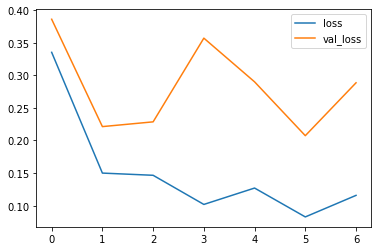

In [26]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

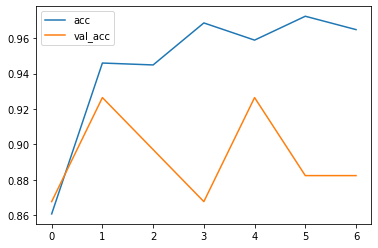

In [27]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

**Testing the model**

In [28]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(150,150))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model.predict(X)
  print(val)
  if val==1:
    plt.xlabel("No fire",fontsize=30)
  elif val==0:
    plt.xlabel("fire",fontsize=30)

1/1 [==============================] - 0s 96ms/step
[[0.]]


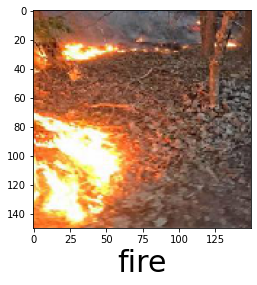

In [29]:
predictImage('/content/drive/MyDrive/archive (1)/forest_fire/Testing/fire/abc169.jpg')

1/1 [==============================] - 0s 29ms/step
[[1.]]


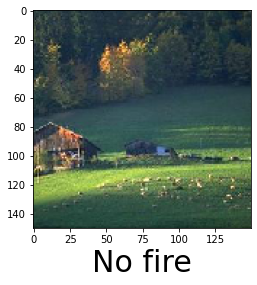

In [31]:
predictImage('/content/drive/MyDrive/archive (1)/forest_fire/Testing/no fire/abc339.jpg')

1/1 [==============================] - 0s 31ms/step
[[0.]]


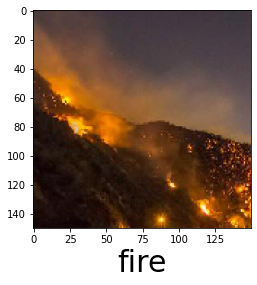

In [32]:
predictImage('/content/drive/MyDrive/archive (1)/forest_fire/Testing/fire/abc181.jpg')